# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [858]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [859]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [860]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [861]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [862]:
df_train.shape

(15223, 52)

In [863]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [864]:
df_test.shape

(14910, 52)

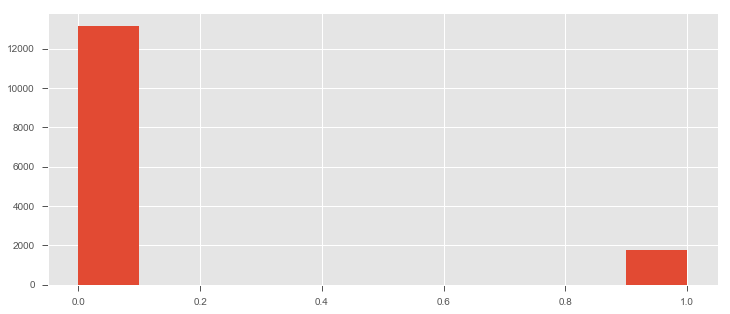

In [865]:
df_test['TARGET'].hist()

## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [866]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [867]:
df = df_test.append(df_train).reset_index(drop=True)

In [868]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [869]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [870]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неоконченное высшее', 'Неполное среднее', 'Высшее', 'Среднее специальное', 'Среднее', 'Два и более высших образования', 'Ученая степень'}


MARITAL_STATUS
{'Разведен(а)', 'Вдовец/Вдова', 'Состою в браке', 'Гражданский брак', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Нефтегазовая промышленность', 'Ресторанный бизнес/Общественное питание', 'Здравоохранение', 'Химия/Парфюмерия/Фармацевтика', 'ЧОП/Детективная д-ть', 'СМИ/Реклама/PR-агенства', 'Развлечения/Искусство', 'Информационные технологии', 'Подбор персонала', 'Сельское хозяйство', 'Энергетика', 'Образование', 'Туризм', 'Недвижимость', 'Маркетинг', 'Металлургия/Промышленность/Машиностроение', 'Управляющая компания', 'Салоны красоты и здоровья', 'Государственная служба', 'Коммунальное хоз-во/Дорожные службы', 'Страхование', 'Другие сферы', 'Юридические услуги/нотариальные услуги', 'Наука', 'Сборочные производства', 'Торговля', 'Информационные услуги', 'Транспорт', 'Банк/Финансы', 'Строительство', 'Логистика'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [871]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

* Всего 2 строки с ПУСТЫМ значением поля "<span style="color:blue">REGION_NM</span>", т.е. менее 0,01% <span style="color:red">=></span> удалим эти СТРОКИ, это не должно повлиять на результат
* Всего 600 строк с ЗАПОЛНЕННЫМ полем "<span style="color:blue">PREVIOUS_CARD_NUM_UTILIZED</span>", т.е. заполнено менее 2% объёма данных <span style="color:red">=></span>  удалим этот СТОЛБЕЦ, этой информации недостаточно, чтобы модель смогла уловить влияние предиктора на результат
* Пропущенные значения в полях '<span style="color:blue">WORK_TIME</span>', '<span style="color:blue">GEN_INDUSTRY</span>', '<span style="color:blue">GEN_TITLE</span>', '<span style="color:blue">ORG_TP_STATE</span>', '<span style="color:blue">ORG_TP_FCAPITAL</span>', '<span style="color:blue">JOB_DIR</span>' встречаются вместе (см. две сводные таблицы ниже) + в этих случаях в основном отcутствует номер рабочего телефона '<span style="color:blue">GEN_PHONE_FL</span>' (см. диаграмму ниже) + средний персональный доход клиентов '<span style="color:blue">PERSONAL_INCOME</span>' существенно больше максимального пособия по безработице (см. ниже)  <span style="color:red">=></span> вероятно клиент не работает, и его доход складывается из других источников; закодируем пропуски значений новой категорией '-1'
* Пропуски в столбце '<span style="color:blue">TP_PROVINCE</span>' составляют менее 2% данных <span style="color:red">=></span>  закодируем пропуски значений новой категорией '-1'

In [872]:
# Анализ совместной встречаемости пропусков в столбцах 'GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL',
# 'JOB_DIR', 'WORK_TIME'
df2 = df[df['WORK_TIME'].isna()][['GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','TP_PROVINCE']] 

values = {'GEN_INDUSTRY': '-1', 'GEN_TITLE': '-1', 'ORG_TP_STATE': '-1', 'ORG_TP_FCAPITAL': '-1', 'JOB_DIR': '-1', \
          'TP_PROVINCE': '-1'} 

df2 = df2.fillna(value=values)

df2_2 = df2[['GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR', 'TP_PROVINCE']].pivot_table(index = \
['GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL'], columns = 'JOB_DIR', aggfunc = np.count_nonzero)

df2_2

TP_PROVINCE  \
JOB_DIR                                                                                              -1   
GEN_INDUSTRY                        GEN_TITLE  ORG_TP_STATE                 ORG_TP_FCAPITAL               
-1                                  -1         -1                           -1                   2707.0   
                                                                            Без участия             6.0   
Коммунальное хоз-во/Дорожные службы Специалист Государственная комп./учреж. Без участия             NaN   
Наука                               Специалист Государственная комп./учреж. Без участия             NaN   
Строительство                       Специалист Государственная комп./учреж. -1                      NaN   
Торговля                            Специалист Частная компания             Без участия             NaN   

                                                                                                                           
JOB_DIR                                                                                     Участие в основ. деятельности  
GEN_INDUSTRY                        GEN_TITLE  ORG_TP_STATE                 ORG_TP_FCAPITAL                                
-1                                  -1         -1                           -1                                        NaN  
                                                                            Без участия                               NaN  
Коммунальное хоз-во/Дорожные службы Специалист Государственная комп./учреж. Без участия                               1.0  
Наука                               Специалист Государственная комп./учреж. Без участия                               1.0  
Строительство                       Специалист Государственная комп./учреж. -1                                        1.0  
Торговля                            Специалист Частная компания             Без участия                               1.0

In [873]:
# Анализ совместной встречаемости пропусков в столбцах 'GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL',
# 'JOB_DIR', 'WORK_TIME'

df3 = df[df['GEN_INDUSTRY'].isna()][['WORK_TIME','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR','TP_PROVINCE']]

values2 = {'WORK_TIME': '-1', 'GEN_TITLE': '-1', 'ORG_TP_STATE': '-1', 'ORG_TP_FCAPITAL': '-1', 'JOB_DIR': '-1', \
          'TP_PROVINCE': '-1'} 

df3 = df3.fillna(value=values2)

df3_2 = df3[['WORK_TIME','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL','JOB_DIR', 'TP_PROVINCE']].pivot_table(index = \
['WORK_TIME','GEN_TITLE','ORG_TP_STATE','ORG_TP_FCAPITAL'], columns = 'JOB_DIR', aggfunc = np.count_nonzero)
df3_2

TP_PROVINCE
JOB_DIR                                                   -1
WORK_TIME GEN_TITLE ORG_TP_STATE ORG_TP_FCAPITAL            
-1        -1        -1           -1                     2707
                                 Без участия               6

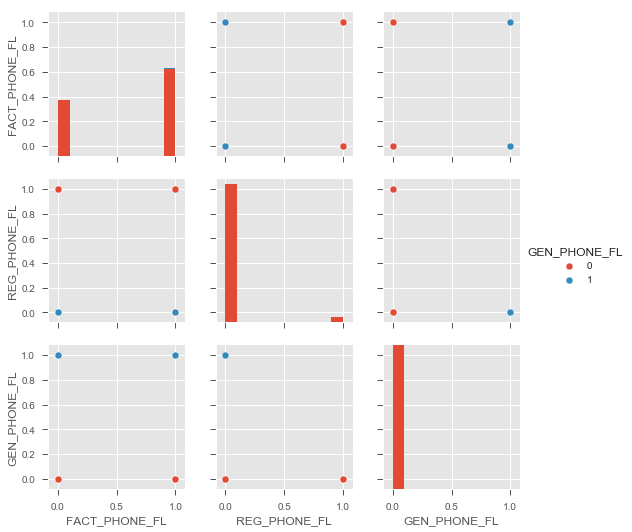

In [874]:
# Гистограммы (по диагонали) указывания номеров телефона: домашнего, по месту регистрации, РАБОЧЕГО. 
df2 = df[df['WORK_TIME'].isna()][['FACT_PHONE_FL', 'REG_PHONE_FL','GEN_PHONE_FL']] 
import seaborn as sns
sns.pairplot(df2[['FACT_PHONE_FL', 'REG_PHONE_FL','GEN_PHONE_FL']], hue="GEN_PHONE_FL")

In [875]:
# Расчёт среднего персонального дохода для лиц не указавших информацию о работе
def preproc_data(df_input):
    df_output = df_input.copy()
        
    ## Your Code Here
    for c in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
        if str(df_output[c].dtype) == 'object':
            df_output[c] = df_output[c].map(lambda x: x.replace(',', '.')).astype('float')
    
    return df_output

df_ = df.pipe(preproc_data)

df_[(df_['WORK_TIME'].isna())][['PERSONAL_INCOME']].describe()

,PERSONAL_INCOME
count,2717.000000
mean,8078.699768
std,4725.533609
min,1950.000000
25%,6000.000000
50%,7000.000000
75%,9000.000000
max,160000.000000


#### Задание 2. Есть ли категориальные признаки? Что с ними делать?
Список категориальных признаков и их значений см. ниже. Предлагается 
* признак 'EDUCATION' перекодировать как порядковый в соответствии с порядком 'Неполное среднее', 'Среднее', 'Среднее специальное', 'Неоконченное высшее', 'Высшее', 'Два и более высших образования', 'Ученая степень'.
* значения признака 'FAMILY_INCOME' заменить числовым значением статистики (например средним) соответствующих диапазонов: 'до 5000 руб.', 'от 5000 до 10000 руб.', 'от 10000 до 20000 руб.', 'от 20000 до 50000 руб.', 'свыше 50000 руб.' 
* остальные категориальные признаки кодировать One Hot Encodingом


In [876]:
# Список категориальных признаков
for c in df_.columns:
        if str(df_[c].dtype) == 'object':
            print(c)            
            print(df_[c].unique())
            
print([c for c in df_.columns if str(df_[c].dtype) == 'object'])

EDUCATION
['Среднее специальное' 'Среднее' 'Высшее' 'Неполное среднее'
 'Неоконченное высшее' 'Два и более высших образования' 'Ученая степень']
MARITAL_STATUS
['Не состоял в браке' 'Состою в браке' 'Разведен(а)' 'Вдовец/Вдова'
 'Гражданский брак']
GEN_INDUSTRY
['Образование' nan 'Металлургия/Промышленность/Машиностроение'
 'Другие сферы' 'Сборочные производства' 'Торговля' 'Строительство'
 'Ресторанный бизнес/Общественное питание' 'Нефтегазовая промышленность'
 'Транспорт' 'Здравоохранение' 'Государственная служба' 'Наука'
 'Развлечения/Искусство' 'ЧОП/Детективная д-ть'
 'Коммунальное хоз-во/Дорожные службы' 'Сельское хозяйство' 'Энергетика'
 'Информационные технологии' 'Управляющая компания' 'Банк/Финансы'
 'Юридические услуги/нотариальные услуги' 'Салоны красоты и здоровья'
 'Информационные услуги' 'Химия/Парфюмерия/Фармацевтика' 'Страхование'
 'СМИ/Реклама/PR-агенства' 'Недвижимость' 'Логистика' 'Туризм'
 'Подбор персонала' 'Маркетинг']
GEN_TITLE
['Специалист' nan 'Рабочий' 'Руково

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [877]:
def preproc_data(df_input):
    df_output = df_input.copy()    
    ## Your Code Here
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    for c in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
        if str(df_output[c].dtype) == 'object':
            df_output[c] = df_output[c].map(lambda x: x.replace(',', '.')).astype('float')
    
    df_output = df_output[~(df_output['REGION_NM'].isna())]
    df_output = df_output.drop(['PREVIOUS_CARD_NUM_UTILIZED'], axis=1)
    values = {'WORK_TIME': -1, 'GEN_INDUSTRY': '-1', 'GEN_TITLE': '-1', 'ORG_TP_STATE': '-1', 'ORG_TP_FCAPITAL': '-1', \
              'JOB_DIR': '-1', 'TP_PROVINCE': '-1'}
    df_output = df_output.fillna(value=values) 
    
    # Recoding categorical
    df_output['EDUCATION'] = df_output['EDUCATION'].map({'Неполное среднее':1, 'Среднее':2, 'Среднее специальное':3, \
    'Неоконченное высшее':4, 'Высшее':5, 'Два и более высших образования':6, 'Ученая степень':7})
    df_output['FAMILY_INCOME'] = df_output['FAMILY_INCOME'].map({'до 5000 руб.': 2500, 'от 5000 до 10000 руб.': 7500, \
    'от 10000 до 20000 руб.': 15000, 'от 20000 до 50000 руб.': 35000, 'свыше 50000 руб.': 55000})
    
    # OneHotEncoder other categorical
    le = preprocessing.LabelEncoder()
    # FIT AND TRANSFORM LabelEncoder
    X_2 = df_output[['MARITAL_STATUS', 'GEN_INDUSTRY', \
                      'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', \
                      'JOB_DIR', 'REG_ADDRESS_PROVINCE', \
                      'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', \
                      'TP_PROVINCE', 'REGION_NM']].apply(le.fit_transform)
    
    enc = preprocessing.OneHotEncoder()
    # FIT OneHotEncoder
    enc.fit(X_2)
    # Transform
    onehotlabels = enc.transform(X_2).toarray()
    
    # concat Numerical features and OneHot-Categorical 
   
    X_3 = df_output[[x for x in df_output.columns if x not in ['MARITAL_STATUS', 'GEN_INDUSTRY', \
                                                                 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', \
                                                                 'JOB_DIR', 'REG_ADDRESS_PROVINCE', \
                                                                 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', \
                                                                 'TP_PROVINCE', 'REGION_NM']]]
    
    X_4 = pd.DataFrame(onehotlabels)
    #print(X_4[X_4.columns[0]].unique())
    #print(X_3.shape)
    #print(X_4.shape)
    
    for c in X_4.columns:
        X_3[c] = X_4[c].values #X_3.loc[:,c] = X_4[c].values
    
    df_output = X_3
    #print(df_output[X_4.columns[0]].unique())
    #print(df_output.shape)
    #print(X_4.columns[0])
    return df_output

In [878]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)


C:\Users\skulivec\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [879]:
# Проверка не осталось ли NaN или категориальных переменных
for c in df_preproc.columns:
    if sum(1*df_preproc[c].isna())>0:
        print(c)
print('===============')
for c in df_preproc.columns:
    if str(df_preproc[c].dtype) == 'object':
        print(c)
df_preproc.head()

sample


,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,FAMILY_INCOME,PERSONAL_INCOME,...,389,390,391,392,393,394,395,396,397,398
0,0,30,1,0,1,1,1,3,15000,7000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,48,0,1,1,0,0,2,15000,4100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,35,1,0,0,1,0,2,35000,40000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,22,1,0,0,0,0,2,35000,20000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,27,1,0,1,2,2,5,35000,17000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [880]:
X, y = df_train_preproc.iloc[:, 1:].values, df_train_preproc.iloc[:, 0].values
X_check, y_check = df_test_preproc.iloc[:, 1:].values, df_test_preproc.iloc[:, 0].values
X_, y_ = X, y # сохраняем для обучения модели в конце

#### Задание 5. Обучение и оценка качества разных моделей

In [881]:
random_state=42
test_size=0.3

from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)



In [882]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from scipy.stats import randint as randint
from scipy.stats import uniform

try:
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import GridSearchCV
    from sklearn.cross_validation import RandomizedSearchCV
    from sklearn.cross_validation import StratifiedKFold

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve
    
    
try:
    from sklearn.model_selection import StratifiedKFold
except ImportError:
    from sklearn.cross_validation import StratifiedKFold
    
from sklearn.cross_validation import cross_val_score

from sklearn.metrics import accuracy_score, precision_score, recall_score

# DecisionTreeClassifier (подбор параметров и кросс-валидация)

In [883]:
## DecisionTreeClassifier с лучшими параметрами на основе RandomizedSearchCV (ниже)
depth = 7
model = Pipeline([
    ('scaler', StandardScaler()),
    ('DTC', DecisionTreeClassifier(random_state=random_state, class_weight=None, criterion='entropy', max_depth=7, min_samples_leaf=5))
    #('DTC', DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=random_state))
])
model.fit(X,y)
print('DecisionTreeClassifier (Acc, Prec, Recall):')
print(accuracy_score(y_test, model.predict(X_test)), precision_score(y_test, model.predict(X_test)), recall_score(y_test, model.predict(X_test)))
y_dt_proba = model.predict_proba(X_test)
y_dt = model.predict(X_test)

DecisionTreeClassifier (Acc, Prec, Recall):
0.8701554631048829 0.2 0.00865051903114187


Text(0,0.5,'ROC AUC')

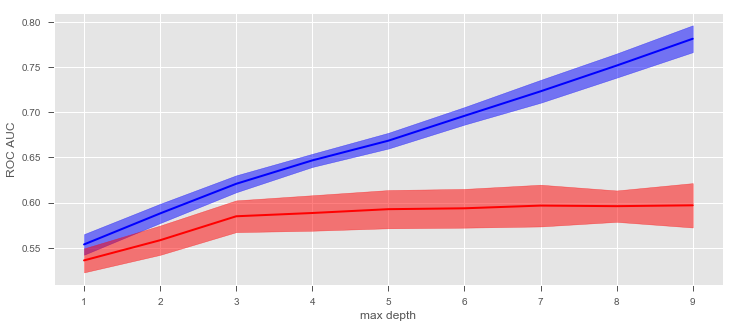

In [884]:
# определение оптимальной глубины дерева на основе кросс-валидации
model = DecisionTreeClassifier(criterion='entropy', random_state=random_state, \
                               class_weight=None, max_depth=7, min_samples_leaf=5)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)

train_scores, valid_scores = validation_curve(model, X, y, 
                                              'max_depth', range(1, 10),
                                              cv=cv, scoring='roc_auc')

train_score_mean = train_scores.mean(axis=1)
train_score_std = train_scores.std(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
valid_scores_std = valid_scores.std(axis=1)

plt.fill_between(range(1,10), train_score_mean-train_score_std, train_score_mean+train_score_std, color='b',
                 interpolate=True, alpha=0.5,)
plt.fill_between(range(1,10), valid_scores_mean-valid_scores_std, valid_scores_mean+valid_scores_std, color='r', 
                 interpolate=True, alpha=0.5)

plt.plot(range(1,10), train_score_mean, c='b', lw=2)
plt.plot(range(1,10), valid_scores_mean, c='r', lw=2)

plt.xlabel('max depth')
plt.ylabel('ROC AUC')

# RandomForestClassifier (подбор параметров и кросс-валидация)

In [885]:
# RandomForestClassifier

depth = 7
model = Pipeline([
    ('scaler', StandardScaler()),
    ('RFC', RandomForestClassifier(n_jobs=-1, random_state=random_state))
])
model.fit(X,y)
print('RandomForestClassifier (Acc, Prec, Recall):')
print(accuracy_score(y_test, model.predict(X_test)), precision_score(y_test, model.predict(X_test)), recall_score(y_test, model.predict(X_test)))
#y_dt_proba = model.predict(X_test)
y_rf_proba = model.predict_proba(X_test)
y_rf = model.predict(X_test)

RandomForestClassifier (Acc, Prec, Recall):
0.8712502737026494 0.1875 0.005190311418685121


# LogisticRegression (подбор параметров и кросс-валидация)

In [886]:
c_range = np.logspace(-3, 3, 10) # from 10^(-3)...10^3 with only 10 values
C=0.001

model = Pipeline([
       ('scaler', StandardScaler()),
       ('clf', LogisticRegression(penalty='l2', fit_intercept=True, C=C))
   ])
model.fit(X, y)
print('LogisticRegression (Acc, Prec, Recall):')
print(accuracy_score(y_test, model.predict(X_test)), precision_score(y_test, model.predict(X_test)), recall_score(y_test, model.predict(X_test)))
#y_dt_proba = model.predict(X_test)
#y_rf_proba = model.predict(X_test)
y_lr_proba = model.predict_proba(X_test)
y_lr = model.predict(X_test)

LogisticRegression (Acc, Prec, Recall):
0.8725640464199693 0.3 0.005190311418685121


C:\Users\skulivec\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [887]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

## Your Code Here

DT score:
0.8701554631048829
RF score:
0.8712502737026494
LR score:
0.8725640464199693


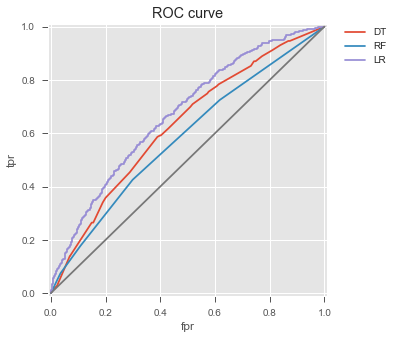

In [888]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе
# y_dt_proba = model.predict_proba(X_test)
# y_rf_proba = model.predict_proba(X_test)
# y_lr_proba = model.predict_proba(X_test)
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_dt_proba[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_rf_proba[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_lr_proba[:,1])

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label="DT")
plt.plot(fpr2, tpr2, label="RF")
plt.plot(fpr3, tpr3, label="LR")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

print('DT score:')
print(accuracy_score(y_test, y_dt))
print('RF score:')
print(accuracy_score(y_test, y_rf))
print('LR score:')
print(accuracy_score(y_test, y_lr))

# Лучшая модель - логистическая регрессия

In [889]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

C=0.001
model = Pipeline([
       ('scaler', StandardScaler()),
       ('clf', LogisticRegression(penalty='l2', fit_intercept=True, C=C))
   ])
model.fit(X_, y_)
print('LogisticRegression (Acc, Prec, Recall):')
print(accuracy_score(y_check, model.predict(X_check)), precision_score(y_check, model.predict(X_check)), \
      recall_score(y_check, model.predict(X_check)))
y_lr_proba = model.predict_proba(X_check)
y_lr = model.predict(X_check)

LogisticRegression (Acc, Prec, Recall):
0.8820846468576028 0.4 0.009142857142857144


LR score:
0.8820846468576028


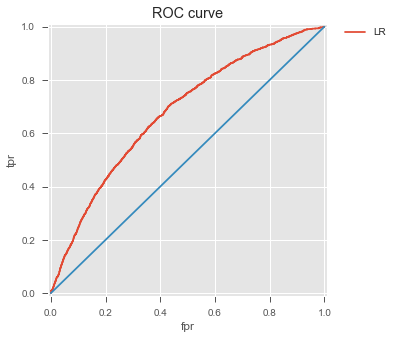

In [890]:
# Померить roc_auc на тесте
fpr3, tpr3, thresholds3 = roc_curve(y_check, y_lr_proba[:,1])

plt.figure(figsize=(5, 5))
plt.plot(fpr3, tpr3, label="LR")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

print('LR score:')
print(accuracy_score(y_check, y_lr))